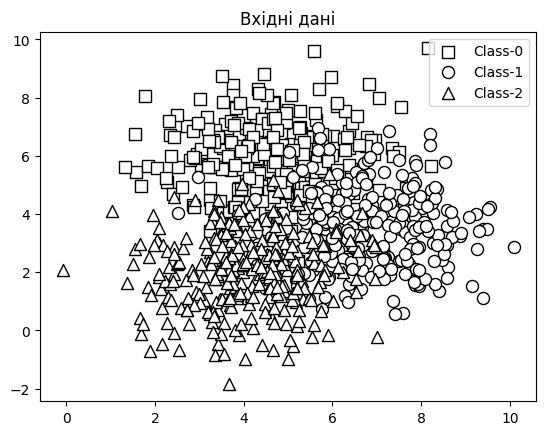

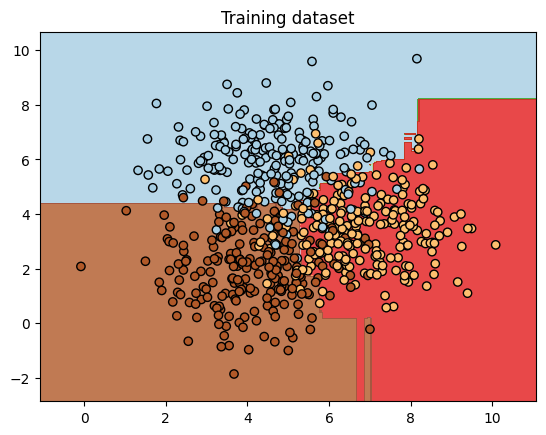

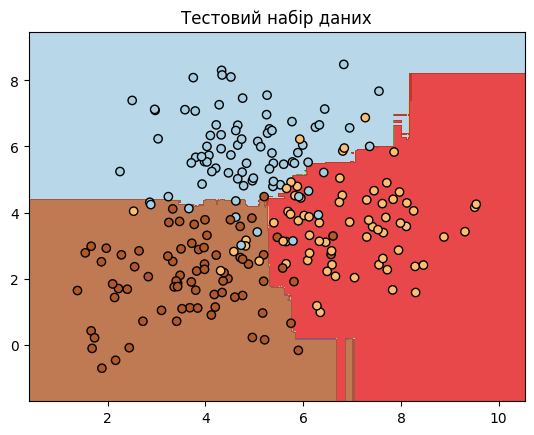


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################

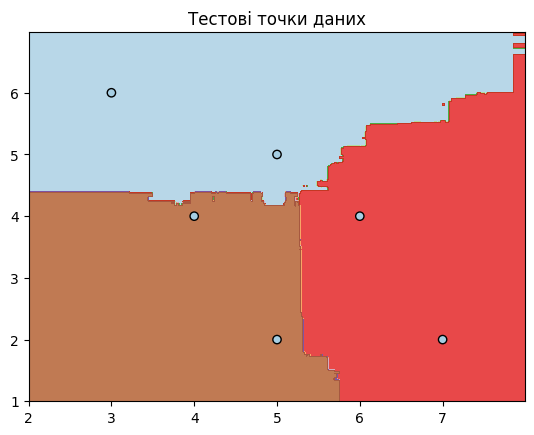

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Функція для візуалізації меж класифікації
def plot_decision_boundaries(classifier, X, y, title):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
  plt.title(title)
  plt.show()

# Тип класифікатора (виберіть 'rf' або 'erf')
classifier_type = 'rf'

# Завантаження вхідних даних
input_file = 'data_random_forests.txt' # Змініть шлях до файлу, якщо потрібно
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Розіб'ємо вхідні дані на три класи
class_0 = X[y == 0]
class_1 = X[y == 1]
class_2 = X[y == 2]

# Візуалізуємо вхідні дані
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1],s=75,facecolors='white',edgecolors='black',linewidth=1,marker='s',label='Class-0')
plt.scatter(class_1[:, 0], class_1[:, 1],s=75,facecolors='white',edgecolors='black',linewidth=1,marker='o',label='Class-1')
plt.scatter(class_2[:, 0], class_2[:, 1],s=75,facecolors='white',edgecolors='black',linewidth=1,marker='^',label='Class-2')
plt.title('Вхідні дані')
plt.legend()
plt.show()

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Класифікатор на основі ансамблевого навчання
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}

# Вибір класифікатора
if classifier_type == 'rf':
  classifier = RandomForestClassifier(**params)
else:
  classifier = ExtraTreesClassifier(**params)

# Навчання класифікатора
classifier.fit(X_train, y_train)
plot_decision_boundaries(classifier, X_train, y_train, 'Training dataset')

# Оцінка на тестовому наборі
y_test_pred = classifier.predict(X_test)
plot_decision_boundaries(classifier, X_test, y_test, 'Тестовий набір даних')

class_names = ['Class-0', 'Class-1', 'Class-2']
print("\n" + "#" * 40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#" * 40 + "\n")

print("#" * 40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#" * 40 + "\n")

# Обчислення параметрів довірливості
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])
print("\nConfidence measure:")

for datapoint in test_datapoints:
  probabilities = classifier.predict_proba([datapoint])[0]
  predicted_class = 'Class-' + str(np.argmax(probabilities))
  print('\nDatapoint:', datapoint)
  print('Predicted class:', predicted_class)

# Візуалізація точок даних
plot_decision_boundaries(classifier, test_datapoints, [0] * len(test_datapoints), 'Тестові точки даних')
plt.show()
